In [26]:
import pandas as pd
import openpyxl
from openpyxl.styles import Font, PatternFill, Border, Side
from openpyxl.utils import get_column_letter

Function to create an Excel template for the financial data reports

In [27]:
def create_financial_template(output_file='financial_template.xlsx'):
    # Create a new workbook
    wb = openpyxl.Workbook()
    ws = wb.active
    ws.title = "Financial_Reports"

    # Define headers
    headers_pl = [
        'Month',
        'Revenue',
        'Cost of Sales',
        'Gross Profit',  # Calculated
        'General expenses',
        'Sales and Marketing Expenses',
        'Salary Expenses',
        'Operating Profit',  # Calculated
        'Financing Expenses',
        'Depreciation  Expenses',
        'Profit Before Tax'  # Calculated
    ]

    headers_cf = [
        'Month',
        'Starting Cash',
        'Profit Before Tax',  # Linked from above
        'Depreciation',  # Linked from above
        'Investments',
        'Loans',
        'Owner financing',
        'Change in Cash',  # Calculated
        'Ending Cash'  # Calculated
    ]

    # Define periods
    periods = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
               'Year 1', 'Year 2', 'Year 3']

    # Write Profit & Loss Table

    ws['A1'] = "Profit & Loss Statement"
    ws['A1'].font = Font(bold=True)


    # Write headers
    for row, header in enumerate(headers_pl, 2):
        cell = ws.cell(row=row, column=1)
        cell.value = header
        cell.font = Font(bold=True)
        # cell.fill = PatternFill(start_color="D9E1F2", end_color="D9E1F2", fill_type="solid")

    # Write periods
    for col, period in enumerate(periods, 2):
        ws.cell(row=2, column=col, value=period)

    # Add formulas for Profit & Loss
    for col in range(2, 17):  # Columns B to P (2 to 15 in 1-based index)
        col_letter = get_column_letter(col)  # Convert column index to letter

        # Gross Profit = Revenue - Cost of Sales
        ws[f'{col_letter}5'] = f'={col_letter}3-{col_letter}4'

        # Total Operating Expenses
        ws[f'{col_letter}9'] = f'={col_letter}5-{col_letter}6-{col_letter}7-{col_letter}8'

        # Profit Before Tax
        ws[f'{col_letter}12'] = f'={col_letter}9-{col_letter}10-{col_letter}11'


    # Write Cash Flow section Table

    ws['A14'] = "Cash Flow Statement"
    ws['A14'].font = Font(bold=True)

    # Write headers
    for row, header in enumerate(headers_cf, 15):
        cell = ws.cell(row=row, column=1)
        cell.value = header
        cell.font = Font(bold=True)
        # cell.fill = PatternFill(start_color="D9E1F2", end_color="D9E1F2", fill_type="solid")

    # Write periods
    for col, period in enumerate(periods, 2):
        ws.cell(row=15, column=col, value=period)


    # Add formulas for Cash Flow
    # Iterate over columns B to P (2 to 16 in Excel column index)
    for col in range(2, 17):
        col_letter = get_column_letter(col)  # Convert column number to letter

        # Row 17 = Row 12
        ws[f'{col_letter}17'] = f'={col_letter}12'

        # Row 18 = Row 11
        ws[f'{col_letter}18'] = f'={col_letter}11'

        # Row 22 = Row 17 + Row 18
        ws[f'{col_letter}22'] = f'={col_letter}17+{col_letter}18'

        # Row 23 = Row 16 + Row 22
        ws[f'{col_letter}23'] = f'={col_letter}16+{col_letter}22'

    # Iterate over columns C to P (3 to 16 in Excel column index)
    for col in range(3, 17):
        col_letter = get_column_letter(col)  # Current column
        prev_col_letter = get_column_letter(col - 1)  # Previous column

        # Row 16 in the current column = Row 23 in the previous column
        ws[f'{col_letter}16'] = f'={prev_col_letter}23'
        if col_letter == 'N':
            ws['N16'] = '=B16'


    # Save the workbook
    wb.save(output_file)

    print("Excel template has been created")

# Create the template
# create_financial_template()

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "financial_data.xlsx"  # Change to your file path
df = pd.read_excel(file_path, engine="openpyxl")

# Extract gross profit values from Profit & Loss Statement
PL_gross_profit = [int(value) if not pd.isna(value) else 0 for value in df.iloc[3, 1:16]]
# Extract operating profit values from Profit & Loss Statement
PL_operating_profit = [int(value) if not pd.isna(value) else 0 for value in df.iloc[7, 1:16]]
# Extract gross profit values from Profit & Loss Statement
PL_profit_before_tax = [int(value) if not pd.isna(value) else 0 for value in df.iloc[10, 1:16]]

# Extract Ending cash values from Cash Flow Statement
CF_ending_cash = [int(value) if not pd.isna(value) else 0 for value in df.iloc[21, 1:16]]

# define a list for the months
months = list(range(1, 13)) + [12, 24, 36]

# Print the extracted values
print("PL_gross_profit: ", PL_gross_profit)
print("PL_operating_profit: ", PL_operating_profit)
print("PL_profit_before_tax: ", PL_profit_before_tax)
print("CF_ending_cash: ", CF_ending_cash)

PL_gross_profit:  [135900, 144960, 158770, 172580, 182080, 192020, 206490, 229580, 252450, 276200, 299950, 323700, 2574680, 2778000, 3024900]
PL_operating_profit:  [11474, 24964, 76644, 55834, 89189, 132534, 97504, 127594, 207594, 226594, 248294, 272094, 1570313, 1834808, 2045167]
PL_profit_before_tax:  [-896, 12814, 64494, 43464, 77039, 120384, 85134, 115444, 195444, 214224, 236144, 259944, 1423633, 1679148, 1882107]
CF_ending_cash:  [-288746, -263782, -187138, -131524, -42335, 90199, 187483, 315077, 522671, 749045, 997339, 1269433, 1269433, 3103321, 5147528]


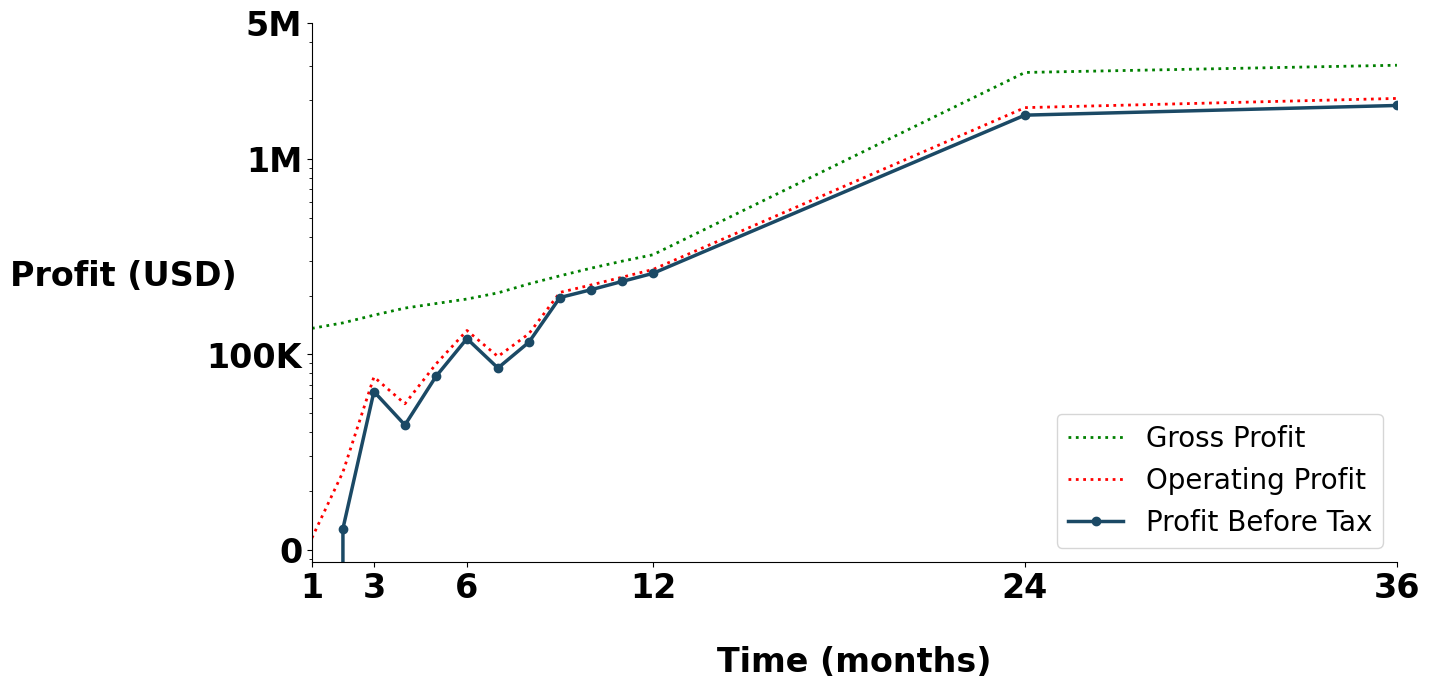

In [29]:
plt.figure(figsize=(14, 7))

# Plot each dataset
plt.plot(months[:12] + months[12+1:], PL_gross_profit[:12] + PL_gross_profit[12+1:]  , marker=' ', linestyle='dotted', linewidth=2, alpha=1,color='green', label="Gross Profit")
plt.plot(months[:12] + months[12+1:], PL_operating_profit[:12] + PL_operating_profit[12+1:], marker=' ', linestyle='dotted', linewidth=2, alpha=1,color='red',  label="Operating Profit")
plt.plot(months[:12] + months[12+1:], PL_profit_before_tax[:12] + PL_profit_before_tax[12+1:], marker='o', linestyle='-',linewidth =2.5, markersize = 6, color="#1B4965", label="Profit Before Tax")

# Labels and Title
plt.xlabel("Time (months)", fontsize=24, fontweight='bold', labelpad=30)
plt.ylabel("Profit (USD)", fontsize=24, fontweight='bold', labelpad=60, rotation=0)
# plt.title("Profit & Loss Statement")
plt.xlim(1, 36)  # Focus mainly on 1-12 (leave space for 24 & 36)

# Apply Logarithmic Scale for better visualization
plt.yscale("log")

# Format Y-axis labels in dollar notation ($10K, $100K, $1M, $10M)
plt.yticks(
    [10_000, 100_000, 1_000_000, 5_000_000],  # Scale levels
    ["0", "100K", "1M", "5M"]  # Labels
)
# Format Y-axis labels in dollar notation ($10K, $100K, $1M, $10M)
plt.xticks(
    [1, 3, 6, 12, 24, 36],  # Scale levels
    ["1", "3", "6", "12", "24", "36"]  # Labels
)

ax = plt.gca()  # Get the current axis
ax.spines["top"].set_visible(False)   # Hide the top border
ax.spines["right"].set_visible(False)  # Hide the left border

plt.xticks(fontsize=24, fontweight = 'bold')  # Increase size of X-axis tick labels
plt.yticks(fontsize=24, fontweight = 'bold')  # Increase size of Y-axis tick labels
# Show legend
plt.legend()

# Show grid with minor lines for better readability
plt.grid(True, which='both', linestyle='--', alpha=0.0)
plt.legend(fontsize=20, loc='lower right')

# Save the plot with transparent background
plt.savefig('profit_loss_plot.png', transparent=True, dpi=300, bbox_inches='tight')

# Display the graph
plt.show()

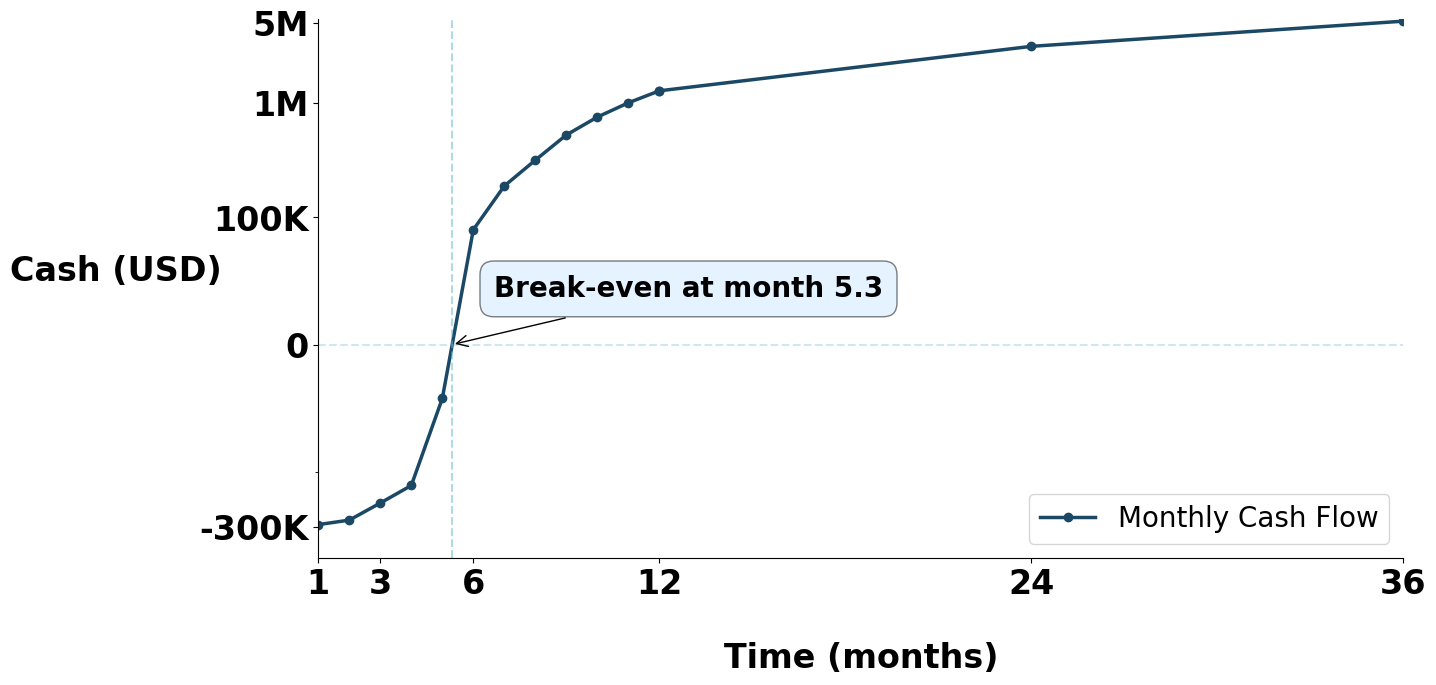

In [30]:
import numpy as np

# Create figure
plt.figure(figsize=(14, 7))

# Plot main data
plt.plot(months, CF_ending_cash, marker='o', linestyle='-', linewidth=2.5, markersize=6, color='#1B4965', label="Monthly Cash Flow" )

# Find zero crossing point
for i in range(len(CF_ending_cash)-1):
    if (CF_ending_cash[i] < 0 and CF_ending_cash[i+1] > 0) or (CF_ending_cash[i] > 0 and CF_ending_cash[i+1] < 0):
        # Interpolate to find exact crossing point
        x_cross = months[i] + (months[i+1] - months[i]) * (-CF_ending_cash[i])/(CF_ending_cash[i+1]-CF_ending_cash[i])

        # Add vertical line and annotation
        plt.axvline(x=x_cross, color='#62B6CB', linestyle='--', alpha=0.5)
        plt.annotate(f'Break-even at month {x_cross:.1f}',
                    xy=(x_cross, 0),
                    fontsize = 20, fontweight='bold',
                    xytext=(30, 30), textcoords='offset points',
                    ha='left', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.5', fc='#CAE9FF', alpha=0.5),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

# Labels and Title
plt.xlabel("Time (months)", fontsize=24, fontweight='bold', labelpad=30)
plt.ylabel("Cash (USD)", fontsize=24, fontweight='bold', labelpad=60, rotation=0)
# plt.title("Cash Flow Statement")
plt.xlim(1, 36)

# Option 1: Use a symmetric log scale (good for data crossing zero)
plt.yscale('symlog', linthresh=100000)  # Linear scaling between -100k and 100k, log scaling beyond

# Add more ticks with focused range
plt.yticks(
    [-300_000, 0, 100_000, 1_000_000, 5_000_000],
    ["-300K", "0", "100K", "1M", "5M"]
)

plt.xticks(
    [1, 3, 6, 12, 24, 36],  # Scale levels
    ["1", "3", "6", "12", "24", "36"]  # Labels
)

# Add horizontal line at y=0
plt.axhline(y=0, color='#62B6CB', linestyle='--', alpha=0.3)

ax = plt.gca()  # Get the current axis
ax.spines["top"].set_visible(False)   # Hide the top border
ax.spines["right"].set_visible(False)  # Hide the left border

plt.xticks(fontsize=24, fontweight = 'bold')  # Increase size of X-axis tick labels
plt.yticks(fontsize=24, fontweight = 'bold')  # Increase size of Y-axis tick labels
# Show legend
plt.legend()

# Show grid with minor lines for better readability
plt.grid(True, which='both', linestyle='--', alpha=0.0)

plt.legend(fontsize=20, loc='lower right')


# Save with transparent background
plt.savefig('cash_flow_analysis.png', transparent=True, dpi=300, bbox_inches='tight')

# Display the graph
plt.show()